<a href="https://colab.research.google.com/github/uoahy-6uoas/HG-Machine/blob/main/hg3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-최근접 이웃 회귀**
> **회귀**란 여러 개의 독립변수와 한 개의 종속변수 간의 상관관계를 모델링하는 기법 _medium_

> **K-최근접 이웃 회귀** 방법은 K개의 가까운 이웃의 평균값을 구함 _책_

In [1]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

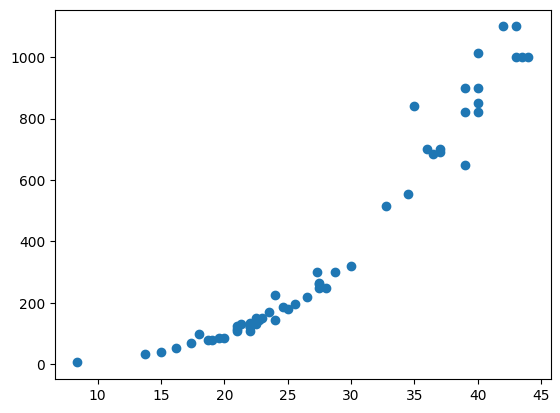

In [2]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42) # 맞춰야할 타겟이 weight임

In [4]:
train_input, train_target

(array([19.6, 22. , 18.7, 17.4, 36. , 25. , 40. , 39. , 43. , 22. , 20. ,
        22. , 24. , 27.5, 43. , 40. , 24. , 21. , 27.5, 40. , 32.8, 26.5,
        36.5, 13.7, 22.7, 15. , 37. , 35. , 28.7, 23.5, 39. , 21. , 23. ,
        22. , 44. , 22.5, 19. , 37. , 22. , 25.6, 42. , 34.5]),
 array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
         120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
         265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
         840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
          80.,  700.,  120.,  197., 1100.,  556.]))

In [5]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
# (-1,1) : 아 전체가 몇 갠지는 모르겠고 일단 1열로 세워라

K-최근접 이웃 회귀 [knr]의 score 산출법 = 결정계수 ($R^2$)<br>
$R^2 = 1 - \frac{(타깃- 예측)^2 의 합}{(타깃- 평균)^2 의 합}$ <br>
따라서 예측이 k개의 평균에 가까운 수준이라면 0점이 나오고 실제 타깃에 가까운 예측을 한다면 1점이 나옴 --> 범위는 -$∞$~1 <br>
> 타깃 = 답이므로 당연히 KNR은 *지도학습*임

In [6]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))
print(f"인풋 모양은 {np.shape(train_input)} 타겟 모양은 {np.shape(train_target)}")
#타겟은 2차원 아니어도 됨? ㅇㅇ

0.992809406101064
인풋 모양은 (42, 1) 타겟 모양은 (42,)


결정계수는 직감적으로 얼마나 높은 점수인지 알기 힘듬<br>
따라서 mean_absolute_error = 타깃과 주변 값들의 차이의 절댓값의 평균..을 구해서 차이를 araboza

In [7]:
from sklearn.metrics import mean_absolute_error
test_prediction =  knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
mae
#평균적으로 19g만큼 차이가 있음을 알 수 있음

19.157142857142862

**오버피팅&언더피팅**<br>
train & test score의 비교로 판단함

In [8]:
if knr.score(train_input,train_target) > knr.score(test_input,test_target):
  print("If there's huge gap, Overfitting")
else:
  print("Underftting")

Underftting


In [9]:
#언더피팅 해결을 위해 k값을 바꿔보자, 기본값은 5개
knr.n_neighbors = 3
knr.fit(train_input,train_target)
if knr.score(train_input,train_target) > knr.score(test_input,test_target):
  print("It's OK as It doesnt make huge difference")
else:
  print("Underftting")

It's OK as It doesnt make huge difference


**확인문제**
1. k-최근접 이웃 회귀에서는 새로운 샘플에 대한 예측을 이웃 샘플의 타겟값의 평균으로 만듬
2. knr에서 k값을 1-5-10으로 바꿔가며 훈련해보고, 농어의 길이를 5에서 45까지 바꿔가며 그 무게 예측을 그래프로 그려보자

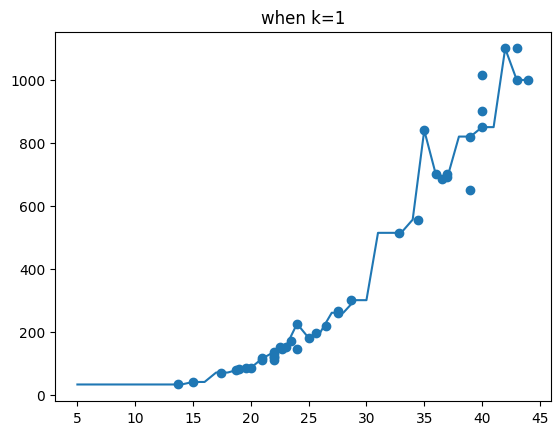

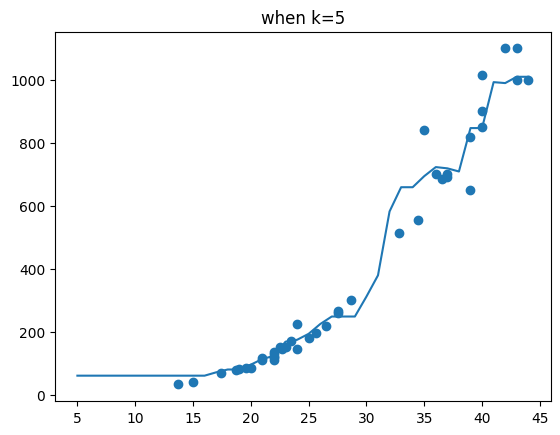

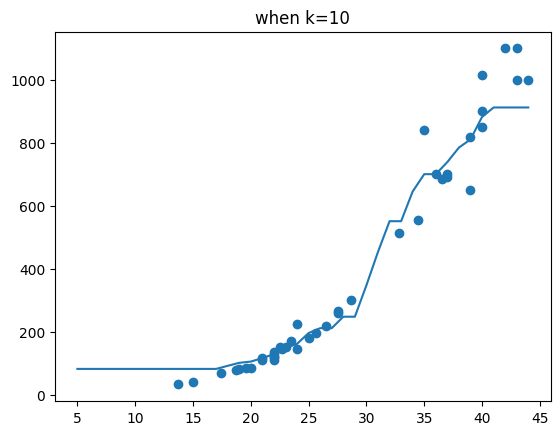

In [10]:
#2번 문제
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)
for i in [1,5,10]:
  knr.n_neighbors = i
  knr.fit(train_input,train_target)
  y = knr.predict(x)

  plt.scatter(train_input, train_target)
  plt.plot(x,y)
  plt.title(f"when k={i}")
  plt.show()

k값이 커지면서 함수 모양도 단순해짐을 확인